# NumPy & Matplotlib Excercises

NumPyとMatplotlibの理解度を深めるために、以下の問題を解いてみましょう. 

#### 1. NumPyとMatplotlibをインポートしましょう.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 2. 全ての要素がint型の1で, サイズが20の配列を作成してください.

In [4]:
arr = np.ones(20)
print(arr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 3. 上記で作成した配列のメモリーサイズを計算してください.

In [224]:
import sys
sys.getsizeof(arr)

176

#### 4. 0から8までの整数から構成される3×3の配列を作成してください.

In [12]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### 5. 0から100までの値の中からランダムに選ばれた10個の値から構成される,  2×5×1の配列を作成してください.

In [32]:
arr = np.random.randint(0, 100, 10).reshape(2,5)
print(arr)

[[36 57 10 90 57]
 [16 62 77 22 35]]


#### 6. 以下の2つの配列を横方向に結合してください.

In [22]:
a = np.linspace(0, 20, 10).reshape(2, 5)
b = np.linspace(20, 40, 10).reshape(2, 5)

In [28]:
print(a)
print(b)
arr = np.hstack([a, b])
print(arr)

[[ 0.          2.22222222  4.44444444  6.66666667  8.88888889]
 [11.11111111 13.33333333 15.55555556 17.77777778 20.        ]]
[[20.         22.22222222 24.44444444 26.66666667 28.88888889]
 [31.11111111 33.33333333 35.55555556 37.77777778 40.        ]]
[[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 20.
  22.22222222 24.44444444 26.66666667 28.88888889]
 [11.11111111 13.33333333 15.55555556 17.77777778 20.         31.11111111
  33.33333333 35.55555556 37.77777778 40.        ]]


#### 7. 以下の2つの配列を1次元ベクトルに直し、昇順に並び替えてください.

In [29]:
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([[10, 9], [8, 7]])

In [54]:
arr = np.hstack([c, d]).ravel()
print(arr)
arr = np.sort(arr)
print(arr)

[ 1  2  3 10  9  4  5  6  8  7]
[ 1  2  3  4  5  6  7  8  9 10]


#### 8. 以下の配列の中で11番目に大きい値を取り出してください.

In [56]:
e = np.random.randint(0, 100000, 10000)

In [59]:
e = np.sort(e)[::-1]
print(e[11])

99866


#### 9. ランダムウォーク(次に移動する位置がランダムに決定される運動のこと)をPython及びNumPyで表現してみましょう.  
ポジションは0から始め, Nステップ後までの毎移動(動く方向は+1もしくは-1)ごとのポジションをリスト形式で返す関数 **randomWalk()** を定義してください.  

e.g.)  
Input: 10 - Output: [0, -1, -2, -3, -4, -3, -2, -3, -2, -3, -2]

In [146]:
# Python (without NumPy; use Python's random library)
def randomWalk(step):
    import random
    position = 0
    a = (1, -1)
    for i in range(step):
        print(position, end=" ")
        position += random.choices(a)[0]
    print(position)
    return position

上記のメソッドを,  Pythonの **itertools.accumulate()** , **random.choices()** メソッドを用いてループを使わずに書き換えてみましょう. 

In [143]:
# Python (without NumPy or loops)
def randomWalkVecterizaton(step):
    import random, itertools
    position = [0]*step
    a = (1, -1)
    position = list(itertools.accumulate(position,lambda x,y: x+random.choices(a)[0]))
    print(position)
    return (position[step-1])

上記のメソッドを, NumPyを用いて書き換えてみましょう.

In [164]:
def randomWalkNumPy(step):
    import random, itertools
    position = np.zeros(step)
    a = (1, -1)
    position = np.array(list(itertools.accumulate(position,lambda x,y: x+random.choices(a)[0])))
    print(position)
    return (position[step-1])

最後に, Pythonのtimeモジュールを用いて, 上記の3つのメソッドの実行時間を比較してみましょう.

In [165]:
import time
start = time.time()
print(randomWalk(10))
end = time.time()
print('time:', end - start)

start = time.time()
print(randomWalkVecterizaton(10))
end = time.time()
print('time:', end - start)

start = time.time()
print(randomWalkNumPy(10))
end = time.time()
print('time:', end - start)


0 1 2 1 0 1 2 1 2 1 0
0
time: 0.0008208751678466797
[0, 1, 2, 3, 2, 3, 4, 3, 4, 5]
5
time: 0.0005660057067871094
[ 0. -1.  0. -1. -2. -3. -4. -5. -6. -7.]
-7.0
time: 0.0056378841400146484


#### 10. sin関数とcos関数のグラフを同じプロット上に描画してください. ただし, 色・軸の場所・メモリの打ち方などは, 画像の通りにしてください.

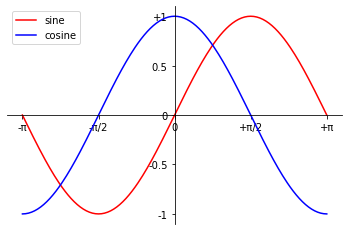

In [223]:
x = np.linspace(-np.pi, np.pi, 201)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), color="red",  label="sine")
ax.plot(x, np.cos(x), color="blue", label="cosine")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])  
ax.set_xticklabels([ "-π", "-π/2", "0", "+π/2", "+π"])
plt.yticks([-1, -0.5, 0, 0.5, +1]) 
ax.set_yticklabels([ "-1", "-0.5", "0", "0.5", "+1"])
ax.legend()
plt.show()